<a href="https://colab.research.google.com/github/afroozsheikh/AI-HW-IUT/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
from scipy import optimize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In this homework, we will build an elementary artificial neural network(ANN) from scratch. Although in real applications, you are more likely to use machine learning frameworks such as TensorFlow or PyTorch, making this simple ANN helps you better grasp ANN concepts and their applications. Therefore you will be able to design your models with an architecture that best suits your application. Note that every variation of neural networks (i.e., CNNs, Autoencoders, GANs) uses the same underlying logic to train their models.


In this homework, we use the Iris flowers data set to train a model that recognizes the flower species given its length and width of sepals and petals in cm. 

We first read the data set and put it into NumPy arrays.

In [2]:
classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
class_idx = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
    }

X = np.empty([0, 4], dtype=float)
Y = np.empty([0], dtype=int)

with open('iris.data') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        X = np.append(X, np.array([row[:4]], dtype=float), axis=0)
        Y = np.append(Y, np.array([class_idx[row[4]]]), axis=0)


We can check the shape of our data set. As you can see, the dataset has 150 rows, and each row has four features.

In [3]:
X.shape, Y.shape

((150, 4), (150,))

Let's take a look at our dataset:

In [4]:
np.random.seed(73)
idx = np.random.random_integers(0, 149, 5)
X[idx], Y[idx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  


(array([[6.3, 2.5, 5. , 1.9],
        [6. , 3. , 4.8, 1.8],
        [5.4, 3.9, 1.3, 0.4],
        [6.3, 3.4, 5.6, 2.4],
        [5.8, 2.7, 4.1, 1. ]]), array([2, 2, 0, 2, 1]))

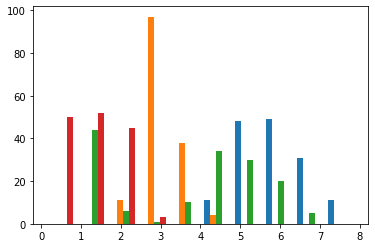

In [5]:
_ = plt.hist(X, bins=10)

As you can see in the image above, the features are not coming from the same distribution. This can slow down the learning process. So we normalize the features:

In [6]:
mu = X.mean(axis=0)
std = X.std(axis=0)

X = (X - mu) / std

new_mu = X.mean(axis=0)
new_std = X.std(axis=0)

(mu, std), (new_mu, new_std)

((array([5.84333333, 3.054     , 3.75866667, 1.19866667]),
  array([0.82530129, 0.43214658, 1.75852918, 0.76061262])),
 (array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15]),
  array([1., 1., 1., 1.])))

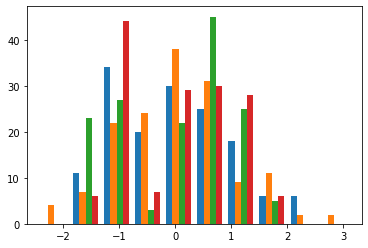

In [7]:
_ = plt.hist(X, bins=10)

Now that our data is ready, we can sample the data for training and testing. We also represent the output as one-hot vectors because this is a multiclass classification problem.

In [8]:
np.random.seed(73)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=73)
y_train_onehot = np.zeros((len(y_train), 3))
y_test_onehot = np.zeros((len(y_test), 3))
y_train_onehot[np.arange(len(y_train)), y_train] = 1
y_test_onehot[np.arange(len(y_test)), y_test] = 1

Let's see what we got:

In [9]:
X_train[:5], y_train_onehot[:5]

(array([[ 0.31099753, -0.35636057,  0.53529583,  0.26469891],
        [-0.41600969, -1.28197243,  0.1372359 ,  0.13322594],
        [-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
        [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
        [ 0.31099753, -0.1249576 ,  0.64902723,  0.79059079]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]))

Now we make the ANN class. You can complete each function separately and then test it.

In [10]:
print(X.shape[0])

150


In [60]:
class ANN:
    def __init__(self):
        #Define Hyperparameters
        self.inputSize = 4
        self.outputSize = 3
        self.hiddenLayerSize = 5

        #Weights (parameters)
        np.random.seed(73)
        self.W1 = np.random.randn(self.inputSize, self.hiddenLayerSize)
        self.B1 = np.random.randn(self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputSize)
        self.B2 = np.random.randn(self.outputSize)


    def sigmoid(self, z):
        # Takes an N-dimensional NumPy array and returns an element-wise operation of sigmoid function.
        # i.e., sigmoid([[0, 0], [0, 0]]) = [[.5, .5], [.5, .5]]
        return 1/(1 + np.exp(-z))
        raise NotImplementedError

    def forward(self, X):
        # Propagate inputs though network
        # Takes an N by four NumPy array and forward pass each data into the network, and returns an N by three NumPy array.
        tmp = np.zeros((X.shape[0], self.hiddenLayerSize))
        yHat = np.zeros((X.shape[0], self.outputSize))

        self.z1 = np.dot(X, self.W1) + self.B1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        yHat = self.sigmoid(self.z2)
        return yHat
        raise NotImplementedError
        

    def costFunction(self, X, y):
        # Compute cost for given X,y, use weights already stored in class.
        # It takes an N by four NumPy array and an N by three NumPy array and returns the cost.
        yHat = self.forward(X)
        J = (1/(2 * X.shape[0])) * (np.sum((y-yHat)**2))
        return J
        raise NotImplementedError
        

    def sigmoidPrime(self, z):
        # Gradient of sigmoid
        # Exactly like sigmoid but computes sigmoid prime.
        return self.sigmoid(z) * (1 - self.sigmoid(z))
        raise NotImplementedError
        
    def costFunctionPrime(self, X, y):
        # Compute derivative of cost funtion with respect to W1, B2, W2 and B2 for a given X and y:
        # It returns a tuple (dJdW1, dJdB1, dJdW2, dJdB2)
        yhat = self.forward(X)

        dz2 = np.multiply((y - yhat), self.sigmoidPrime(self.z2))
        dz1 = np.multiply(np.dot(dz2, self.W2.T), self.sigmoidPrime(self.z1))

        dJdW2 = np.dot(self.a1.T, dz2)
        dJdB2 = np.sum(dz2, axis=0)
        
        dJdW1 = np.dot(X.T, dz1)
        dJdB1 = np.sum(dz1, axis=0)
        

        return dJdW1, dJdB1, dJdW2, dJdB2

    # Helper Functions for interacting with other classes:
    def getParams(self):
        # Get W1, B2, W2 and B2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.B1.ravel(), self.W2.ravel(), self.B2.ravel()))
        return params
    
    def setParams(self, params):
        # Set W1, B2, W2 and B2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputSize , self.hiddenLayerSize))
        B1_end = W1_end + self.hiddenLayerSize
        self.B1 = np.reshape(params[W1_end:B1_end], (self.hiddenLayerSize, ))
        W2_end = B1_end + self.hiddenLayerSize*self.outputSize
        self.W2 = np.reshape(params[B1_end:W2_end], (self.hiddenLayerSize, self.outputSize))
        self.B2 = np.reshape(params[W2_end:], (self.outputSize, ))
        
    def computeGradients(self, X, y):
        dJdW1, dJdB1, dJdW2, dJdB2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdB1.ravel(), dJdW2.ravel(), dJdB2.ravel()))

In [61]:
nn = ANN()

array([[0.26894142, 0.5       ],
       [0.5       , 0.62245933]])

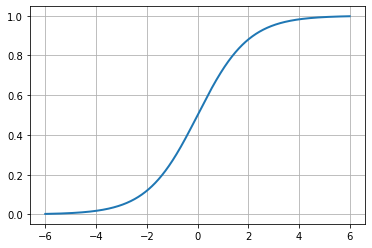

In [17]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, nn.sigmoid(testInput), linewidth= 2)
plt.grid(1)

nn.sigmoid(np.array([[-1, 0], [0, .5]]))
# expected output:
#array([[0.26894142, 0.5       ],
#       [0.5       , 0.62245933]])

In [18]:
nn.forward(X[:5])
# expected output:
#array([[0.72052718, 0.84649298, 0.51906706],
#       [0.63717065, 0.75110948, 0.58001566],
#       [0.63298084, 0.77253503, 0.55563411],
#       [0.61439324, 0.74732184, 0.56420755],
#       [0.71183855, 0.84417469, 0.51366321]])

array([[0.72052718, 0.84649298, 0.51906706],
       [0.63717065, 0.75110948, 0.58001566],
       [0.63298084, 0.77253503, 0.55563411],
       [0.61439324, 0.74732184, 0.56420755],
       [0.71183855, 0.84417469, 0.51366321]])

In [19]:
nn.costFunction(X_train[:5], y_train_onehot[:5])
# expected output: 0.5763824209224693

0.5763824209224692

array([[0.19661193, 0.25      ],
       [0.25      , 0.23500371]])

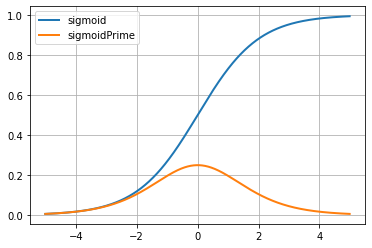

In [20]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, nn.sigmoid(testValues), linewidth=2)
plt.plot(testValues, nn.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
_ = plt.legend(['sigmoid', 'sigmoidPrime'])

nn.sigmoidPrime(np.array([[-1, 0], [0, .5]]))
# expected output:
#array([[0.19661193, 0.25      ],
#      [0.25      , 0.23500371]])

In [62]:
nn.costFunctionPrime(X_train[:5], y_train_onehot[:5])
# expected output:
#(array([[ 0.04389436, -0.01233158, -0.03930225, -0.03089115,  0.02125308],
#        [-0.06408486,  0.04882734, -0.20210593, -0.05453893,  0.01765934],
#        [ 0.08433972, -0.00961007,  0.02968869, -0.01215821,  0.02899575],
#        [ 0.08565181,  0.00802509, -0.0168669 , -0.02840264,  0.04119043]]),
# array([0.04967214, 0.08713484, 0.15121598, 0.07526614, 0.02604243]),
# array([[ 0.21773751, -0.05705008,  0.18516151],
#        [ 0.10910991,  0.05184359,  0.16448014],
#        [ 0.25746164, -0.12346014,  0.14636687],
#        [ 0.14202263, -0.04765655,  0.146961  ],
#        [ 0.06489163,  0.13938047,  0.34666707]]),
# array([0.30263182, 0.04032182, 0.48144777]))

(array([[-0.04389436,  0.01233158,  0.03930225,  0.03089115, -0.02125308],
        [ 0.06408486, -0.04882734,  0.20210593,  0.05453893, -0.01765934],
        [-0.08433972,  0.00961007, -0.02968869,  0.01215821, -0.02899575],
        [-0.08565181, -0.00802509,  0.0168669 ,  0.02840264, -0.04119043]]),
 array([-0.04967214, -0.08713484, -0.15121598, -0.07526614, -0.02604243]),
 array([[-0.21773751,  0.05705008, -0.18516151],
        [-0.10910991, -0.05184359, -0.16448014],
        [-0.25746164,  0.12346014, -0.14636687],
        [-0.14202263,  0.04765655, -0.146961  ],
        [-0.06489163, -0.13938047, -0.34666707]]),
 array([-0.30263182, -0.04032182, -0.48144777]))

Here is the trainer class that trains our network.

In [ ]:
class trainer:
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [ ]:
t = trainer(nn)

In [ ]:
t.train(X_train, y_train_onehot, X_test, y_test_onehot)

Optimization terminated successfully.
         Current function value: 0.008333
         Iterations: 133
         Function evaluations: 493
         Gradient evaluations: 493


Let's see the results:

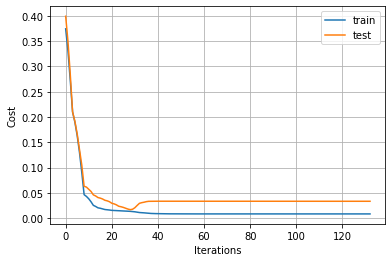

In [ ]:
plt.plot(t.J)
plt.plot(t.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
_ = plt.legend(["train", "test"])

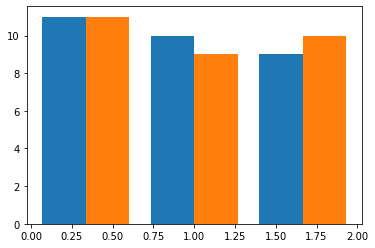

In [ ]:
y_pred = nn.forward(X_test).argmax(axis=1)
_ = plt.hist([y_pred, y_test], bins=3)